<a href="https://colab.research.google.com/github/ParitoshP702/BO_vs_RL_Pricing/blob/main/Deterministic_policy_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import math
import random
from tqdm import tqdm
from scipy.optimize import minimize

In [ ]:
def logit(p):
  return np.exp(p)/(1+np.exp(p))

In [ ]:
def value_optimize(p,*args):
  val1,val2,beta1,beta2 = args
  # print(args)
  return -((p-val1+val2)*logit(beta1+beta2*p)+val1)

In [ ]:
C = 10
S = 20

In [ ]:
def value_iteration_matrix(beta1,beta2,pl,ph):
  value_mat = np.zeros(shape = (S+1,C+1))
  policy_mat = np.zeros(shape = (S,C))
  for row in range(S-1,-1,-1):
    for col in range(C-1,-1,-1):
      val = minimize(value_optimize,x0 = np.random.uniform(1,20),args = (value_mat[row+1,col],value_mat[row+1,col+1],beta1,beta2),bounds = [(pl,ph)])
      policy_mat[row,col] = val["x"]
      value_mat[row,col] = -val["fun"]
  return value_mat,policy_mat



In [ ]:
value,policy = value_iteration_matrix(2,-0.4,1,20)

In [ ]:
value

array([[47.79329627, 46.31944766, 44.30453284, 41.69240735, 38.43433829,
        34.48017897, 29.76759884, 24.20641372, 17.64898388,  9.81517647,
         0.        ],
       [45.87807132, 44.62715714, 42.8439282 , 40.46093222, 37.42221238,
        33.67374393, 29.15162232, 23.76550596, 17.36838791,  9.68115829,
         0.        ],
       [43.86487158, 42.83665791, 41.29266652, 39.15087284, 36.34538656,
        32.81652968, 28.49784863, 23.29841041, 17.07172553,  9.53975971,
         0.        ],
       [41.7534199 , 40.94258403, 39.64275608, 37.75374222, 35.19619746,
        31.90230113, 27.80161616, 22.80194263, 16.75709184,  9.39013322,
         0.        ],
       [39.54684226, 38.94129991, 37.88632979, 36.26023231, 33.96583787,
        30.92373684, 27.05740231, 22.27232218, 16.42222917,  9.23127808,
         0.        ],
       [37.25263308, 36.83208592, 36.01636149, 34.66040666, 32.64424212,
        29.8722108 , 26.25861621, 21.7050203 , 16.06443607,  9.06200136,
         0.   

In [ ]:
policy

array([[ 5.66613815,  5.97552261,  6.34360028,  6.77019429,  7.26059945,
         7.82852615,  8.50201085,  9.33808763, 10.46785578, 12.31517113],
       [ 5.54140873,  5.83449465,  6.19305912,  6.61556562,  7.10569151,
         7.67594441,  8.35322045,  9.1937867 , 10.32862702, 12.18119895],
       [ 5.42227818,  5.69390225,  6.03892666,  6.45467411,  6.94308397,
         7.51491394,  8.19587989,  9.04131598, 10.18177303, 12.03989692],
       [ 5.31212901,  5.55624378,  5.88252552,  6.2879056 ,  6.7724616 ,
         7.34493005,  8.02929319,  8.87971596, 10.02574015, 11.88992023],
       [ 5.21475421,  5.42493748,  5.72598276,  6.11598415,  6.59361199,
         7.16520555,  7.85238013,  8.70792601,  9.86015698, 11.73126563],
       [ 5.13404199,  5.304276  ,  5.57220823,  5.94035804,  6.40670209,
         6.97487646,  7.66414052,  8.52457379,  9.68357006, 11.56200354],
       [ 5.07301657,  5.19929798,  5.4257516 ,  5.76347223,  6.21229662,
         6.77356745,  7.46310168,  8.32829688

In [ ]:
num_states = 2

In [ ]:
policy = nn.Sequential(nn.Linear(num_states,32),
                       nn.ReLU(),
                      #  nn.Linear(64,32),
                      #  nn.ReLU(),
                       nn.Linear(32,1))
                      #  nn.ReLU())

In [ ]:
state_action = 3

In [ ]:
q_function = nn.Sequential(nn.Linear(state_action,32),
                          #  nn.ReLU(),
                          #  nn.Linear(64,32),
                           nn.ReLU(),
                           nn.Linear(32,1))
                          #  nn.ReLU())

In [ ]:
q_function(torch.tensor([2.0,5.0,11.7891]))

tensor([-0.5534], grad_fn=<AddBackward0>)

In [ ]:
params1 = list(policy.parameters())
params2 = list(q_function.parameters())

In [ ]:
theta_target = []
for i in range(len(params1)):
  theta_target.append(params1[i].data)

In [ ]:
theta_target_array = []
phi_target_array = []

In [ ]:
policy.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5592,  0.0301],
                      [-0.4174, -0.3230],
                      [ 0.5066,  0.2356],
                      [ 0.0906, -0.2009],
                      [ 0.2878, -0.1851],
                      [ 0.6653, -0.6799],
                      [-0.4538,  0.3250],
                      [-0.5662, -0.4008],
                      [-0.3145, -0.3708],
                      [ 0.3868,  0.0510],
                      [ 0.2037, -0.4084],
                      [-0.3041, -0.6414],
                      [ 0.4140,  0.6741],
                      [-0.0822,  0.4027],
                      [ 0.0569, -0.6645],
                      [ 0.5765, -0.3054],
                      [-0.2318,  0.6960],
                      [-0.5274, -0.6000],
                      [-0.6279, -0.5809],
                      [ 0.5005,  0.0366],
                      [-0.1024,  0.0104],
                      [ 0.3407,  0.0203],
                      [-0.0176,  0.5910],
        

In [ ]:
theta_target

[tensor([[ 0.5592,  0.0301],
         [-0.4174, -0.3230],
         [ 0.5066,  0.2356],
         [ 0.0906, -0.2009],
         [ 0.2878, -0.1851],
         [ 0.6653, -0.6799],
         [-0.4538,  0.3250],
         [-0.5662, -0.4008],
         [-0.3145, -0.3708],
         [ 0.3868,  0.0510],
         [ 0.2037, -0.4084],
         [-0.3041, -0.6414],
         [ 0.4140,  0.6741],
         [-0.0822,  0.4027],
         [ 0.0569, -0.6645],
         [ 0.5765, -0.3054],
         [-0.2318,  0.6960],
         [-0.5274, -0.6000],
         [-0.6279, -0.5809],
         [ 0.5005,  0.0366],
         [-0.1024,  0.0104],
         [ 0.3407,  0.0203],
         [-0.0176,  0.5910],
         [-0.1744, -0.6147],
         [-0.5078,  0.6974],
         [-0.3592, -0.4305],
         [ 0.5977,  0.1238],
         [ 0.3120,  0.3333],
         [ 0.0923,  0.1645],
         [ 0.3643,  0.2867],
         [ 0.6583,  0.2983],
         [ 0.3998, -0.0828]]),
 tensor([ 0.5788, -0.2777, -0.2826,  0.4696, -0.4418,  0.5695, -0.2887

In [ ]:
phi_target = []
for i in range(len(params2)):
  phi_target.append(params2[i].data)

In [ ]:
a = torch.tensor(1).numpy()
a<0.5

False

In [ ]:
def channel_episode(policy):
  C = 10.
  S = 20.
  c,s = C,1.
  reward_array = []
  action_array = []
  state_array = []
  while s<=S and c>0:
    state_array.append([c,s])
    price = policy(torch.tensor([c,s])) + torch.tensor(np.random.normal(0,1))
    if price < torch.tensor(1):
      price = torch.tensor(1)
    elif price > torch.tensor(20):
      price = torch.tensor(20)
    action_array.append(price)
    demand_prob = torch.divide(torch.exp(2-0.4*price),torch.tensor(1)+torch.exp(2-0.4*price))
    unif = torch.tensor(np.random.uniform(0,1))
    if unif<demand_prob:
      reward_array.append(price)
      s += 1
      c -= 1
    else:
      reward_array.append(0)
      s+=1
  return state_array,action_array,reward_array,[s,c]

In [ ]:
from collections import namedtuple

In [ ]:
Rollout = namedtuple('Rollout',['states','actions','rewards','next_states'])

In [ ]:
# rho = 0.8

In [ ]:
def update_agent(rollouts,policy,q_function,theta_target,phi_target,episode):
  states = torch.cat([r.states for r in rollouts],dim = 0)
  actions = torch.cat([r.actions for r in rollouts],dim = 0)
  rewards = torch.cat([r.rewards for r in rollouts],dim = 0).flatten()
  next_states = torch.cat([r.next_states for r in rollouts],dim = 0)
  B = len(next_states)
  optimizer1 = optim.Adam(q_function.parameters(),lr = 0.001)
  optimizer2 = optim.Adam(policy.parameters(),lr = 0.001)
  epochs = 10
  for epoch in range(epochs):
      targ_policy = nn.Sequential(nn.Linear(2,32),
                                  # nn.ReLU(),
                                  # nn.Linear(64,32),
                                  nn.ReLU(),
                                  nn.Linear(32,1))
                                  # nn.ReLU())
      targ_q = nn.Sequential(nn.Linear(2,32),
                                  nn.ReLU(),
                                  # nn.Linear(64,32),
                                  # nn.ReLU(),
                                  nn.Linear(32,1))
                                  # nn.ReLU())
      n = 0
      for p in targ_policy.parameters():
        # numel = p.numel()
        # u = theta_target[n:n+numel]
        p.data = theta_target[n]
        n += 1
      n = 0
      for p in targ_q.parameters():
        # numel = p.numel()
        # u = phi_target[n:n+numel]
        p.data = phi_target[n]
        n += 1
      targ_actions = targ_policy(next_states)
      state_action_targ = torch.cat((next_states,targ_actions),dim = 1)
      targ_reward = targ_q(state_action_targ)
      ytarg = rewards + targ_reward.flatten()
      print(ytarg)
      state_action_pairs = torch.cat((states,actions),dim = 1)
      ypred = q_function(state_action_pairs).flatten()
      print(ypred)
      loss_q = torch.sum(torch.pow(ypred - ytarg,2.0))
      loss_q = loss_q/torch.tensor(B)
      # print(f"Q function loss for critic{loss_q}")
      #optimization step
      # optimizer1.zero_grad()
      # with torch.no_grad():
      loss_q.backward()
      optimizer1.step()

      # print(q_function.state_dict())

      actions_train = policy(states)
      state_action_new = torch.cat((states,actions_train),axis = 1)
      pol_rewards = q_function(state_action_new).flatten()
      loss_pol = torch.sum(pol_rewards)
      print(loss_pol)
      loss_pol = loss_pol/torch.tensor(B)
      # print(loss_pol)

      # print(policy.state_dict())
      #optimizations step
      # optimizer2.zero_grad()
      # print(f"Policy loss for updation{loss_pol}")
      # with torch.no_grad():
      loss_pol.backward()
      optimizer2.step()

      # params1 = list(policy.parameters())
      # params2 = list(q_function.parameters())

      i = 0
      rho = 0.8
      for p in policy.parameters():
        print(p.data)
        theta_target[i]  = 0.8*theta_target[i] + 0.2*p.data
        i += 1
      i = 0
      for q in q_function.parameters():
        phi_target[i] = 0.8*phi_target[i] + 0.2*q.data
        i += 1
  # print(theta_target)
  # path1 = "theta_target5"+str(episode)+".txt"
  # path2 = "phi_target5"+str(episode)+".txt"
  # torch.save(theta_target,path1)
  # torch.save(phi_target,path2)
  return policy,q_function,theta_target,phi_target

In [ ]:
def ddpg(policy,q_function,theta_target,phi_target,episodes = 100,num_rollouts = 10):
  for episode in range(episodes):
    rollouts = []
    state_array,action_array,reward_array,last_state = channel_episode(policy)
    next_state_array = []
    for i in range(1,len(state_array)):
      next_state_array.append(state_array[i])
    next_state_array.append(last_state)
    samples = []
    state_array = np.array(state_array)
    next_state_array = np.array(next_state_array)
    for i in range(len(state_array)):
      samples.append((state_array[i],action_array[i],reward_array[i],next_state_array[i]))
    states,actions,rewards,next_states = zip(*samples)
    states = torch.stack([torch.from_numpy(state) for state in states],dim = 0).float()
    next_states = torch.stack([torch.from_numpy(next_state) for next_state in next_states],dim = 0).float()
    actions = torch.as_tensor(actions).unsqueeze(1)
    rewards = torch.as_tensor(rewards).unsqueeze(1)
    rollouts.append(Rollout(states,actions,rewards,next_states))
    policy,q_function,theta_target,phi_target = update_agent(rollouts,policy,q_function,theta_target,phi_target,episode)
  return policy,q_function,theta_target,phi_target


In [ ]:
policy,q_function,theta_target,phi_target = ddpg(policy,q_function,theta_target,phi_target)

Streaming output truncated to the last 5000 lines.
        [ 1.1857, -0.1979],
        [-1.1540, -0.1781],
        [-0.5662, -0.4008],
        [-0.3145, -0.3708],
        [ 1.2075,  0.7911],
        [ 1.1022,  0.4904],
        [-0.3041, -0.6414],
        [ 1.2079,  1.3771],
        [ 0.8163,  1.1203],
        [ 0.0569, -0.6645],
        [ 1.1274,  0.2272],
        [-1.1292,  0.0420],
        [-0.5274, -0.6000],
        [-0.6279, -0.5809],
        [ 1.1155,  0.7081],
        [-0.9880, -0.8794],
        [-0.5558, -0.8738],
        [-0.9149, -0.1363],
        [-0.1744, -0.6147],
        [-1.1289,  0.6000],
        [-0.3592, -0.4305],
        [ 0.9899,  0.6457],
        [ 1.2105,  1.2179],
        [ 0.9909,  1.0365],
        [ 0.8977,  0.8780],
        [ 1.2645,  0.9148],
        [ 1.2706,  0.7400]])
tensor([ 1.2893, -0.2777,  0.4828,  1.3683, -1.3382,  1.0894, -0.8334, -0.4639,
        -0.7048,  0.4308,  1.2803,  0.0276,  0.8602,  0.4407, -0.5302,  1.0093,
        -0.6025, -0.2600, -0.010

In [ ]:
theta_target

[tensor([[ 1.3743,  0.7932],
         [-0.4174, -0.3230],
         [ 1.3738,  1.0027],
         [ 1.0893,  0.7981],
         [-0.7085, -1.1814],
         [ 1.2858, -0.0978],
         [-1.2540, -0.2781],
         [-0.5662, -0.4008],
         [-0.3145, -0.3708],
         [ 1.3076,  0.8912],
         [ 1.2023,  0.5905],
         [-0.3041, -0.6414],
         [ 1.3080,  1.4772],
         [ 0.9164,  1.2204],
         [ 0.0569, -0.6645],
         [ 1.2275,  0.3273],
         [-1.2292, -0.0580],
         [-0.5274, -0.6000],
         [-0.6279, -0.5809],
         [ 1.2156,  0.8082],
         [-1.0880, -0.9794],
         [-0.6558, -0.9738],
         [-1.0149, -0.2363],
         [-0.1744, -0.6147],
         [-1.0286,  0.7002],
         [-0.3592, -0.4305],
         [ 1.0900,  0.7458],
         [ 1.3106,  1.3180],
         [ 1.0910,  1.1366],
         [ 0.9978,  0.9781],
         [ 1.3646,  1.0149],
         [ 1.3707,  0.8400]]),
 tensor([ 1.3894, -0.2777,  0.5829,  1.4684, -1.4382,  1.1895, -0.9334

In [ ]:
np.exp(1.6)/(1+np.exp(1.6))

0.8320183851339245

In [ ]:
np.log(0.2689414213699951/(1-0.2689414213699951))

-1.0000000000000002

In [ ]:
pol_new(torch.tensor([10.,10.]))

tensor([0.], grad_fn=<ReluBackward0>)

In [ ]:
arr1 = torch.load("/content/theta_target530.txt")
arr2 = torch.load("/content/theta_target590.txt")

In [ ]:
pol_new = nn.Sequential(nn.Linear(2,32),
                        nn.ReLU(),
                        nn.Linear(32,1))
                        # nn.ReLU())

In [ ]:
for p in pol_new.parameters():
  print(p.data)

tensor([[ 2.9345e-01, -2.6656e-01],
        [-5.6269e-01,  1.3612e-01],
        [-6.2431e-01, -5.1517e-01],
        [ 3.4069e-01, -6.0739e-01],
        [ 1.9941e-01,  2.3000e-01],
        [-4.6914e-02,  3.5863e-01],
        [-6.5873e-01, -4.7644e-01],
        [ 1.2426e-01,  4.7398e-01],
        [ 6.7344e-01, -6.1656e-01],
        [-3.5642e-01, -4.0766e-01],
        [ 2.7994e-01,  6.2270e-02],
        [-3.0198e-01,  2.9083e-01],
        [-1.7743e-02, -5.4237e-01],
        [ 5.9529e-02,  6.9872e-03],
        [ 1.8264e-01, -4.2454e-01],
        [-4.9914e-01,  1.0497e-01],
        [ 6.7009e-01, -4.6501e-01],
        [-6.8884e-01,  3.3626e-02],
        [-6.4469e-01, -4.3564e-01],
        [-5.1263e-01, -2.9956e-01],
        [-5.0643e-01,  2.6954e-01],
        [-3.3959e-01,  6.2625e-01],
        [ 5.9613e-02,  2.5297e-04],
        [ 3.4825e-01, -3.6318e-01],
        [-2.5886e-01,  4.2981e-01],
        [-7.5635e-02, -2.2013e-01],
        [-6.3693e-01,  1.4684e-01],
        [ 1.7456e-01, -3.282

In [ ]:
pol_new(torch.tensor([17.0,10.0]))

tensor([-472.6810], grad_fn=<AddBackward0>)

In [ ]:
policy.state_dict()

OrderedDict([('0.weight',
              tensor([[ 1.3783,  0.7972],
                      [-0.4174, -0.3230],
                      [ 1.3778,  1.0067],
                      [ 1.0933,  0.8021],
                      [-0.7125, -1.1854],
                      [ 1.2898, -0.0938],
                      [-1.2580, -0.2821],
                      [-0.5662, -0.4008],
                      [-0.3145, -0.3708],
                      [ 1.3116,  0.8952],
                      [ 1.2063,  0.5945],
                      [-0.3041, -0.6414],
                      [ 1.3120,  1.4812],
                      [ 0.9204,  1.2244],
                      [ 0.0569, -0.6645],
                      [ 1.2315,  0.3313],
                      [-1.2332, -0.0620],
                      [-0.5274, -0.6000],
                      [-0.6279, -0.5809],
                      [ 1.2196,  0.8122],
                      [-1.0920, -0.9834],
                      [-0.6598, -0.9778],
                      [-1.0189, -0.2403],
        

In [ ]:
n = 0
for p in pol_new.parameters():
  p.data = theta_target[n]
  n+=1

In [ ]:
pol_new.state_dict()

OrderedDict([('0.weight',
              tensor([[ 1.3743,  0.7932],
                      [-0.4174, -0.3230],
                      [ 1.3738,  1.0027],
                      [ 1.0893,  0.7981],
                      [-0.7085, -1.1814],
                      [ 1.2858, -0.0978],
                      [-1.2540, -0.2781],
                      [-0.5662, -0.4008],
                      [-0.3145, -0.3708],
                      [ 1.3076,  0.8912],
                      [ 1.2023,  0.5905],
                      [-0.3041, -0.6414],
                      [ 1.3080,  1.4772],
                      [ 0.9164,  1.2204],
                      [ 0.0569, -0.6645],
                      [ 1.2275,  0.3273],
                      [-1.2292, -0.0580],
                      [-0.5274, -0.6000],
                      [-0.6279, -0.5809],
                      [ 1.2156,  0.8082],
                      [-1.0880, -0.9794],
                      [-0.6558, -0.9738],
                      [-1.0149, -0.2363],
        

In [ ]:
ret_array = []
for i in range(10):
  ret_array.append(calc_returns_ddpg(pol_new))

The demand probability is0.2689414213699951
The demand probability is[0.18792763]
The demand probability is[0.1654061]
The demand probability is[0.20862497]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.19545537]
The demand probability is[0.25918812]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.12860768]
The demand probability is0.2689414213699951
The demand probability is[0.09880851]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.094

In [ ]:
ret_array

[array([6.210534], dtype=float32),
 array([7.6931176], dtype=float32),
 array([3.2382874], dtype=float32),
 array([5.2078037], dtype=float32),
 array([8.779601], dtype=float32),
 8,
 7,
 array([8.032043], dtype=float32),
 5,
 6]

In [ ]:
theta_target_array = []
for i in range(100):
  path = "/content/theta_target4"+str(i)+".txt"
  arr = torch.load(path)
  theta_target_array.append(arr)

In [ ]:
phi_target_array = []
for i in range(100):
  path = "/content/phi_target4"+str(i)+".txt"
  arr = torch.load(path)
  phi_target_array.append(arr)

In [ ]:
theta_target_array[80]

[tensor([[-7.5468e-01, -9.4325e-01],
         [ 6.7126e-01,  1.4598e+00],
         [-6.3677e-01, -3.1570e-01],
         [ 4.1686e-01,  1.2170e+00],
         [ 1.1319e+00,  5.4241e-01],
         [ 1.3365e+00,  2.7595e-01],
         [ 2.5669e-01,  1.3234e+00],
         [ 1.3325e+00,  8.4968e-01],
         [-5.1276e-01, -6.1160e-01],
         [ 1.3787e+00,  1.1027e+00],
         [ 1.1597e+00,  8.8339e-01],
         [ 6.2683e-01,  1.3884e+00],
         [ 9.5227e-03, -3.1955e-01],
         [ 8.0533e-01,  1.2221e+00],
         [ 1.1184e+00,  8.3992e-01],
         [-2.5943e-01,  2.2329e-02],
         [-1.1067e-01, -2.1736e-01],
         [ 1.1626e+00,  1.4264e+00],
         [ 1.2213e+00,  1.4637e-01],
         [-3.2986e-01, -3.0530e-01],
         [ 1.1038e+00,  1.3752e+00],
         [ 1.0453e+00,  7.5782e-01],
         [ 4.1789e-01,  1.1762e+00],
         [ 1.4823e+00,  1.4326e+00],
         [ 1.2601e+00,  3.5956e-01],
         [ 6.7224e-02,  1.2140e+00],
         [ 1.3994e+00,  7.2265e-01],
 

In [ ]:
theta_target_array[8]

[tensor([[-3.4688e-02, -2.2331e-01],
         [-5.2087e-02,  7.3641e-01],
         [-6.3677e-01, -3.1570e-01],
         [-3.0690e-01,  4.9343e-01],
         [ 4.0829e-01, -1.8137e-01],
         [ 6.1941e-01, -4.4114e-01],
         [-4.6703e-01,  5.9993e-01],
         [ 6.0923e-01,  1.2640e-01],
         [-5.1276e-01, -6.1160e-01],
         [ 6.5533e-01,  3.7931e-01],
         [ 4.3628e-01,  1.5996e-01],
         [-9.6650e-02,  6.6499e-01],
         [ 9.5227e-03, -3.1955e-01],
         [ 8.1951e-02,  4.9868e-01],
         [ 3.9506e-01,  1.1652e-01],
         [-2.5943e-01,  2.2329e-02],
         [-1.1067e-01, -2.1736e-01],
         [ 4.3932e-01,  7.0302e-01],
         [ 4.9794e-01, -5.7722e-01],
         [-3.2986e-01, -3.0530e-01],
         [ 3.8048e-01,  6.5184e-01],
         [ 3.2197e-01,  3.4470e-02],
         [-3.0561e-01,  4.5285e-01],
         [ 7.5907e-01,  7.0931e-01],
         [ 5.3646e-01, -3.6422e-01],
         [-6.5672e-01,  4.9034e-01],
         [ 6.7609e-01, -6.8335e-04],
 

In [ ]:
phi_target_array[2]

[tensor([[-0.0680,  0.2806, -0.3583],
         [-0.4847,  0.4880, -0.5439],
         [ 0.1853,  0.5010, -0.3245],
         [-0.2375,  0.2245,  0.3921],
         [-0.5548, -0.0773, -0.2361],
         [-0.1768,  0.4229, -0.4740],
         [-0.1719, -0.4922,  0.0726],
         [-0.0469,  0.4911, -0.2594],
         [-0.2664,  0.1524, -0.5250],
         [-0.1734, -0.4265, -0.1481],
         [ 0.5067, -0.2345,  0.5118],
         [-0.3562,  0.1206,  0.4466],
         [ 0.0616, -0.2426, -0.3884],
         [-0.1850, -0.4873,  0.5084],
         [ 0.1867,  0.5522,  0.1833],
         [ 0.0829,  0.0891,  0.4312],
         [ 0.0882, -0.3642, -0.5531],
         [ 0.1338,  0.0789, -0.0018],
         [-0.1603,  0.2613, -0.5008],
         [-0.0104,  0.1119, -0.5586],
         [-0.2932, -0.0510, -0.5294],
         [ 0.2005,  0.3476, -0.1790],
         [-0.5634,  0.1432,  0.1242],
         [ 0.3785,  0.5181,  0.0963],
         [ 0.3729,  0.0254,  0.1342],
         [ 0.3803,  0.1209,  0.2819],
         [ 0

In [ ]:
torch.save(theta_target_array,"theta_target_array_ddpg.txt")
torch.save(phi_target_array,"phi_target_array_ddpg.txt")

In [ ]:
q_function(torch.tensor([2.0,3.0,11.7983]))

tensor([88.3264], grad_fn=<AddBackward0>)

In [ ]:
pol_new(torch.tensor([1.,7.]))

tensor([0.], grad_fn=<ReluBackward0>)

In [ ]:
def calc_returns_ddpg(policy):
  C = 10.
  S = 20.
  c,s = C,1.
  # reward_array = []
  # action_array = []
  # state_array = []
  returns = 0
  while s<=S and c>0:
    # state_array.append([c,s])
    price = policy(torch.tensor([c,s])) + torch.tensor(np.random.normal(0,1))
    if price < torch.tensor(1):
      price = torch.tensor(1)
    elif price > torch.tensor(20):
      price = torch.tensor(20)
    price = price.detach().numpy()
    # action_array.append(price)
    demand_prob = np.exp(-price)/(1+np.exp(-price))
    print(f"The demand probability is{demand_prob}")
    unif = np.random.uniform(0,1)
    if unif<demand_prob:
      # reward_array.append(price)
      returns += price
      s += 1
      c -= 1
    else:
      # reward_array.append(0)
      s+=1
  return returns

In [ ]:
best_till_now_ddpg = []
for i in range(len(theta_target_array)):
  theta_target = theta_target_array[i]
  policy = nn.Sequential(nn.Linear(2,64),
                         nn.ReLU(),
                         nn.Linear(64,32),
                         nn.ReLU(),
                         nn.Linear(32,1),
                         nn.ReLU()
                         )
  n = 0
  for p in policy.parameters():
    p.data = theta_target[n]
    n += 1
  return_array = []
  for i in range(10):
    return_array.append(calc_returns_ddpg(policy))
  returns = np.mean(return_array)
  print(returns)
  val = np.max([0,47.79 - returns])
  if len(best_till_now_ddpg) == 0:
    best_till_now_ddpg.append(val)
  else:
    mini = np.min(best_till_now_ddpg)
    val = np.min([mini,val])
    best_till_now_ddpg.append(val)



The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.23404254]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.17967044]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.04015874]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The de

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Streaming output truncated to the last 5000 lines.
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.20114496]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


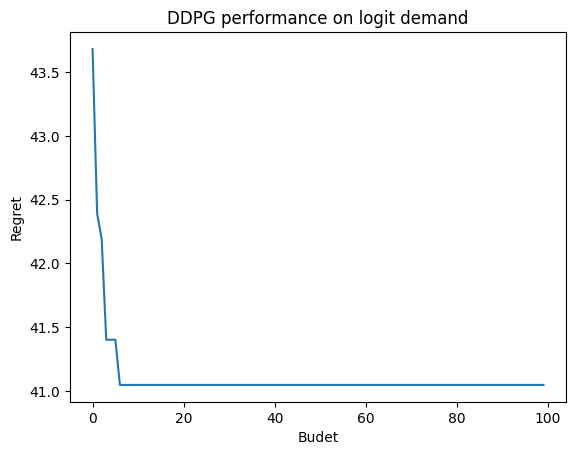

In [ ]:
plt.plot(best_till_now_ddpg)
plt.xlabel("Budet")
plt.ylabel("Regret")
plt.title("DDPG performance on logit demand")
plt.savefig("DDPG.png")

In [ ]:
boer_performance = [[20.491305447515824,
  52.763337377917665,
  15.043026663420179,
  37.48968951835169,
  25.582495128242638,
  45.88821533538548,
  15.74353867661279,
  7.0,
  44.708131684452155,
  16.235066539010603,
  6.959889603750855,
  8.895862974971209,
  50.20431166538058,
  48.585296941016445,
  26.810551739381708,
  12.187229919255937,
  34.19049409446271,
  8.757719360037516,
  10.214845966119183,
  3.0,
  13.414036897738155,
  7.36951513394502,
  34.724390784607,
  35.36842819803445,
  11.833020881052748,
  40.67991976710166,
  12.159288679683913,
  50.78811174761236,
  2.0,
  10.191235822850276,
  9.600872503866714,
  50.1698589033576,
  44.312845303704776,
  6.403901528820078,
  47.78300542632002,
  47.24340423388165,
  44.50829458469113,
  30.57352017532582,
  35.060509950544805,
  28.352309946060757,
  38.424794806611494,
  44.06642380583689,
  16.596334826780875,
  47.54776503398608,
  10.302096224511372,
  31.409305586686838,
  39.551751580969565,
  20.51808864188149,
  26.717760951418903,
  8.381725166269641,
  36.39580764671244,
  5.2538591543997395,
  1.0,
  14.894178373207314,
  25.62000858342343,
  16.029989877145034,
  15.015636608289888,
  15.93407541286142,
  12.592089558580355,
  12.482813900984763,
  16.450445196511993,
  16.265765747952084,
  50.58090644751202,
  28.06164875558867,
  12.377736075971544,
  48.68419936432279,
  48.096953711449366,
  48.12791270406694,
  40.41944699573347,
  26.727048667828868,
  40.17047916318144,
  31.03982140472221,
  20.892016047272296,
  5.712704647732302,
  18.401674569469552,
  35.89818908741817,
  13.150853544728426,
  6.976922287615597,
  11.750932668809057,
  13.544621458951543,
  34.396489710241624,
  21.117868692573282,
  38.22432353446517,
  51.45514927874824,
  44.101442384838364,
  53.5662290189936,
  38.26220247981288,
  4.071377930486904,
  4.032088927860425,
  12.023024771381206,
  18.38631858137809,
  34.36351306293719,
  20.0747469737384,
  63.121894235677956,
  25.097858778787906,
  29.164723417301516,
  45.52594282380081,
  39.05099259472289,
  11.173838619995845,
  16.885622217509948],
 [35.31638897731515,
  12.61668001039552,
  4.135168217292405,
  35.36797480400944,
  49.343502421913875,
  9.080995453069928,
  30.415582432721102,
  43.37304777761933,
  17.12528995531438,
  1.0,
  37.909968419583734,
  49.18219966557369,
  36.42209022639563,
  48.28596777539946,
  13.932034121567115,
  53.62853918673787,
  48.032875046372666,
  36.60777207774263,
  21.810695538694063,
  57.15855841706663,
  7.479812346299089,
  50.24470586030783,
  46.056451383221734,
  43.84966984931915,
  11.23167236509457,
  14.424048033865681,
  6.5482973194488645,
  5.203346709796653,
  39.459832848768755,
  10.770534719690222,
  22.431126391293176,
  21.085182290372423,
  51.63929054476914,
  8.840863900467273,
  25.321597513102503,
  14.510250808121217,
  20.43389614665808,
  53.51616799639188,
  32.28920207259632,
  24.961818272247612,
  58.57046118933733,
  9.027383191736037,
  5.559394897729826,
  14.635438736665327,
  15.639161213176575,
  65.29144190805307,
  3.0,
  8.283855878149916,
  54.13153265958254,
  6.6785746286471515,
  35.64715982855067,
  42.51758842983604,
  51.83586246165776,
  3.1555169548237645,
  11.583339533271714,
  59.60853518884706,
  9.924732684236787,
  13.917270726006599,
  16.631918549670008,
  49.54647700274775,
  38.640422651740764,
  9.824395724300002,
  14.07433156310919,
  37.16809279156392,
  7.620378114715326,
  4.484358263173477,
  29.552357086957834,
  56.0035146077599,
  26.326794491444886,
  41.36848777967963,
  18.361049202573408,
  2.124082852566952,
  14.020580266412779,
  21.83615833122198,
  12.935083733143262,
  17.729082718381687,
  30.356292970985088,
  23.487735030391878,
  5.60447774603,
  24.228074996880302,
  3.0,
  53.858411850922806,
  11.495912790823422,
  20.36259043535493,
  5.0,
  7.0,
  26.984194577230106,
  34.41849678563439,
  42.13124923229019,
  37.21213468600005,
  53.40075905818643,
  14.70513665380672,
  28.656161561707762,
  28.020476523763595,
  39.809373637764104,
  28.10249410783689,
  52.650486530293335,
  35.09187046255706,
  5.746867517380224,
  60.72782894092935],
 [31.384041242925054,
  25.951905816047358,
  29.300778281116372,
  6.517690398888018,
  54.13383124500631,
  17.26552492322672,
  23.5788567195293,
  57.277577991900046,
  14.99489119559809,
  45.39356641088684,
  25.426978762638416,
  9.382323091416515,
  7.499805250659951,
  49.235017332421066,
  41.26683558445599,
  15.214938139875214,
  26.277964687414137,
  9.460568085228756,
  23.801878323608864,
  16.48641168161488,
  21.797078175538736,
  50.33471036604531,
  24.899199367890617,
  9.339476747705572,
  35.01475804133881,
  26.705273475174216,
  14.674873107226984,
  3.2988804606395594,
  27.017827657101243,
  12.262459981917818,
  54.35265149771908,
  31.79139347402678,
  13.929199571798172,
  30.51248460956652,
  10.413726615625302,
  22.11908921347706,
  50.60944353387249,
  47.00757656866816,
  30.994055012158935,
  5.335034457215627,
  40.212889827804084,
  25.478846099778444,
  7.759328246291984,
  36.24397056167238,
  12.496748789269292,
  35.121199373070674,
  39.3717137885982,
  17.777409259395423,
  56.23186876159791,
  50.67208466881121,
  49.379466262274484,
  50.91960090056244,
  4.16416562101839,
  51.587129172245646,
  33.395951469636465,
  6.9691137558284595,
  6.749112055966915,
  29.65802095013025,
  4.0,
  49.82452613418728,
  29.826884928375613,
  46.30936115814342,
  30.745812794243626,
  48.37972059184495,
  28.7819559005678,
  41.50854721884993,
  10.76041647514717,
  38.05397755761115,
  18.209427806633208,
  38.64993986556831,
  33.918078063941905,
  9.141013471144808,
  49.12625961684425,
  21.42771843379382,
  11.729580349139143,
  31.982451926056964,
  7.215612339332236,
  1.0,
  24.69518476764681,
  10.370201194011067,
  36.69158278619785,
  2.0,
  24.46178033405213,
  6.780677316217723,
  46.566227176162855,
  46.913829457753536,
  18.11101330138719,
  17.91601591191958,
  43.64828816309061,
  18.92601052810486,
  26.2804327777914,
  47.690251993034515,
  13.00094492347603,
  20.948233427265684,
  16.432051749211308,
  13.428928118069164,
  51.07529118146044,
  10.615496011466462,
  27.884387663119224,
  31.91264016896608],
 [4.209846958887356,
  9.920963517041253,
  5.09665484890334,
  13.259480514460371,
  36.33166759640687,
  30.893109362550554,
  19.916601957436725,
  20.884610560642983,
  41.6594580021351,
  26.459057780139005,
  1.0,
  6.485173951498828,
  11.404049480071802,
  32.67838901403461,
  15.146402790871251,
  11.332375602754723,
  4.0,
  11.893993875086972,
  27.816610791504804,
  23.65387226816221,
  2.4033102666848083,
  5.499227713156324,
  41.63257412875888,
  37.00369867181358,
  13.476806444818981,
  17.656812803113628,
  16.854189048788683,
  39.394897273244254,
  26.12209761268224,
  30.8007423698101,
  60.7663547886484,
  18.48190084580297,
  14.164805102844237,
  31.684135619236443,
  52.657703410519936,
  34.409954436223536,
  11.17896600392195,
  45.54085880472459,
  16.422382673781684,
  12.190505854351962,
  15.019264798193205,
  4.0,
  34.09847120582376,
  17.03667952530929,
  51.821277180792,
  46.901294552457365,
  50.735866765799734,
  13.724340267528461,
  8.77004862948483,
  12.09949800912781,
  46.842216198266186,
  42.537619869305985,
  3.260719351551787,
  17.348031476618626,
  53.08027620878694,
  26.677430895100308,
  8.808271206889595,
  40.638695673551474,
  10.976767005695763,
  9.499725444151142,
  16.36880509901191,
  17.084985660663534,
  31.781797213029428,
  56.90647564661644,
  45.82668337341124,
  7.929453058362418,
  20.14306746662248,
  21.69658514286288,
  36.2574312460834,
  41.40050043676068,
  18.348646134862996,
  31.688363352727873,
  46.4644925693161,
  7.321149279566093,
  39.92853751228448,
  13.768819431005369,
  21.872672174735207,
  42.961069105907725,
  10.990505763122648,
  30.197852633615785,
  54.08086076393326,
  45.505146076144776,
  6.3710489200434886,
  14.81051694915681,
  26.983526413903775,
  39.760848470021074,
  7.999359759836102,
  20.77512510514581,
  19.84181024159302,
  7.771629397350051,
  50.52463236506468,
  13.61501369004229,
  49.31629250711074,
  48.690874108399605,
  10.095648416385023,
  11.22161280749103,
  6.0,
  5.0,
  50.754728976259365,
  5.440127041651337],
 [43.12833533205318,
  15.957710539405772,
  10.984969831031602,
  16.15545921426183,
  29.93165346528716,
  8.282995126866268,
  5.333912127052161,
  21.882061484142298,
  31.75192171423861,
  14.450729352723865,
  45.920535493562696,
  25.508513566095992,
  9.985332624489162,
  24.700282535545107,
  36.656805148969795,
  16.05889218520945,
  35.141254605344265,
  23.56967471981716,
  40.97262880071034,
  14.650327132877162,
  15.843269220355086,
  8.707182781495009,
  32.37633069912847,
  5.033949142546062,
  5.7559571131689165,
  27.33929632143409,
  41.394787264745396,
  33.30364383945118,
  34.13390392467937,
  11.741379646767392,
  10.776103384945673,
  37.59968865218353,
  27.687448160065017,
  10.917875718874878,
  10.922559897448528,
  50.43998051279347,
  40.11740386087126,
  54.71961228932139,
  2.0,
  58.492662780818705,
  60.47198769968908,
  40.05861349503588,
  16.878071734523182,
  2.1236508982032376,
  5.253778159872318,
  42.61247029370338,
  27.490649450029565,
  9.252881425095197,
  35.48398711666309,
  49.66507800174988,
  13.53222692412201,
  41.752269284274306,
  21.643112019936694,
  8.82997882507564,
  29.95359396315207,
  27.152559826682097,
  15.415376443412347,
  15.22427959290421,
  16.313274108813644,
  9.426041825149806,
  34.3202804932816,
  45.994687124326795,
  34.76852197917929,
  13.056022297622153,
  11.94725588391717,
  35.767441356425145,
  24.438413343438807,
  25.09526958249464,
  19.627611662181607,
  16.90847243019909,
  36.24916886553232,
  41.27407079681049,
  10.983395076589819,
  53.14659460732687,
  21.976144153006256,
  41.1012260644874,
  48.19188341433922,
  33.821053328281884,
  4.1079711286490275,
  19.041521388038134,
  3.0,
  10.587669473291028,
  48.771550421476014,
  29.229194135454406,
  52.02142398330784,
  49.782107731131525,
  51.45083673581894,
  44.772281189471244,
  27.742506941430868,
  9.143814353728736,
  52.46195528280209,
  49.57655604580333,
  6.569264392303735,
  20.233838696988236,
  15.313920420192186,
  9.675463161643288,
  25.30140199786696,
  20.357360423858637,
  31.357616927859226,
  35.17771958128284],
 [50.40778797641544,
  49.43763450422974,
  53.51730032114988,
  49.09114964931193,
  5.0,
  5.0,
  43.99035651423813,
  6.97831012781984,
  6.10246070681784,
  11.699444648920924,
  49.73759789135706,
  15.100453109957623,
  54.46434876678665,
  25.14178533669349,
  32.963911798816355,
  18.91107823525344,
  25.873605229081104,
  10.31536825570918,
  17.381264737804457,
  21.851490959007798,
  30.043467491952125,
  4.3382702595836165,
  17.752589597437225,
  16.3536251947772,
  8.100417870890997,
  19.492018940077035,
  30.941163483673716,
  18.486338177411774,
  28.892106575607855,
  54.502499887878606,
  65.39648188230964,
  24.83396056109214,
  20.82245005731076,
  13.083667357082163,
  9.18768536825706,
  28.98168457105319,
  59.039910506257606,
  26.06140269318705,
  29.753746070627546,
  27.50467379865851,
  24.955324167143083,
  55.015078736587604,
  38.0585197255018,
  5.644261374627492,
  37.67613254226416,
  10.517527482023743,
  3.554832123720294,
  16.838821157275675,
  15.673539454145814,
  26.401032673884337,
  57.66037544538526,
  12.784264664807296,
  58.21419000437995,
  30.14234010207892,
  11.42320510627723,
  10.64218410182517,
  36.16553688928714,
  27.366358081983286,
  17.557834097657967,
  6.062755000247055,
  54.867125901370926,
  30.59889869315535,
  36.5290780482779,
  22.19745328983599,
  30.213826537482845,
  15.6155438765423,
  47.23948475655456,
  37.872238970245874,
  8.59829498618632,
  24.53618525183656,
  22.130511139390002,
  41.146591288107466,
  55.82235832870907,
  21.379511163524846,
  17.637054579636875,
  36.54823626116941,
  30.59749799528373,
  51.25590563068955,
  15.678848880227825,
  51.18029308141831,
  10.695302403212011,
  13.209403851979062,
  28.907659620531263,
  27.56355669184005,
  11.151866781853206,
  9.044535147029272,
  5.0,
  69.8307468103516,
  8.109065849328593,
  59.817410203099854,
  1.003472844654091,
  14.547936444705252,
  22.937568468181528,
  20.821547591266032,
  23.140816083204683,
  41.25871181032008,
  8.688649562147308,
  48.82471208486429,
  30.87975484957553,
  35.898470983293244],
 [10.198237612719213,
  21.09177177083542,
  24.10678015227098,
  29.94883835475104,
  13.521343650562773,
  11.564145572890354,
  50.54227517260133,
  14.373472849358517,
  19.994884872453298,
  20.07210537292733,
  29.264087567887916,
  21.961164446908843,
  5.0,
  16.850212600662537,
  11.040686663566122,
  38.131195275950574,
  31.45624893949438,
  17.13923716368324,
  12.319216217356562,
  6.223026646471534,
  10.656211599307314,
  49.164195959610204,
  5.10003949977583,
  16.29524141516728,
  54.07580021181255,
  16.36746960798244,
  15.280170540301214,
  15.012573459610913,
  16.262678124022017,
  42.58343974287151,
  38.543471824520104,
  32.3935022304359,
  23.00129739982748,
  7.628447858472763,
  18.193017699125985,
  11.618511810272052,
  26.18544834342583,
  37.870314513754884,
  15.770206115290328,
  48.552326668299685,
  53.74282403164301,
  16.88199283709584,
  29.110834771552398,
  6.417837301931674,
  2.0,
  21.25384236239558,
  24.22336892205838,
  32.80304366542693,
  7.830441890183632,
  0,
  55.54337368291651,
  2.5116515064503258,
  51.562827106437446,
  2.1277057449100942,
  35.58233409275022,
  15.73971304993584,
  42.10291132416964,
  13.846475619867075,
  23.34414048027458,
  51.220495436157904,
  7.61507746272715,
  15.282733324511383,
  6.818603906203606,
  17.875345554509053,
  4.407243186336613,
  17.745798723798703,
  43.74107477817792,
  42.05651348511056,
  47.25338759928622,
  7.892161808622443,
  33.98320441083251,
  12.453841533991138,
  26.69324550037487,
  41.948420008781675,
  18.078611314990543,
  17.50966687198973,
  10.66617485216704,
  17.207478931891934,
  50.29283484475277,
  29.64959239029431,
  15.07455749435937,
  40.275896976372366,
  13.90613598725977,
  25.81505975853309,
  17.63549225888543,
  11.222851831669349,
  26.323334512535677,
  21.78102419464532,
  12.511069212839034,
  38.182562870698796,
  15.311203619636203,
  25.202325632483575,
  49.80473906173802,
  11.813538698033447,
  4.159630072670323,
  18.61975404580052,
  23.295096042164403,
  31.84907571436058,
  10.975213631209545,
  50.3520884356451],
 [41.382628341712234,
  40.593405348447575,
  12.246041674311904,
  9.05638698093443,
  42.934697238918844,
  30.747635560223735,
  36.019713483386006,
  43.52049869050644,
  51.26742205016864,
  21.482650258123556,
  24.553321888071785,
  19.44796209893964,
  50.21770146253961,
  52.74614969436311,
  15.325933404335082,
  4.588038500198463,
  45.14057997820848,
  40.900113116196955,
  35.71806698572106,
  15.332049544114417,
  32.76519102412526,
  41.83099892001069,
  2.0,
  27.36385249020139,
  11.82799289739286,
  52.77598988845424,
  37.73736949576411,
  22.112253968856024,
  31.53692565029205,
  20.19431473803322,
  53.384681917582725,
  8.938602992209008,
  15.92485796117743,
  20.236979523923768,
  41.31050985695559,
  35.37784284409831,
  7.615187718265329,
  50.69302636982895,
  4.315311037559792,
  37.264002981322136,
  16.307640777983217,
  54.60614439886594,
  30.858605811952305,
  6.3932380339220005,
  12.473772329161442,
  51.97862233585932,
  6.188509967902007,
  10.90963120938965,
  22.75459212648074,
  30.578721858067055,
  28.923856122839975,
  6.838522649133594,
  20.74705261377736,
  44.83734667271894,
  40.11870016110179,
  23.863365975674512,
  19.36855854128271,
  21.801492681134988,
  20.94962644280009,
  53.44890980844761,
  19.114731957293305,
  42.186623945170204,
  32.91652712239907,
  49.242615326532004,
  33.509513081221236,
  47.61215295353979,
  48.65220127064622,
  7.878618391740361,
  37.89041071563513,
  9.053843428559745,
  25.596123008058065,
  24.51088331637263,
  33.553932700660305,
  36.12631530652156,
  56.790727676201556,
  43.22806066743459,
  2.1770841392613827,
  21.34919530637147,
  5.720321368270863,
  65.74428485727631,
  0,
  3.0,
  22.54628041275957,
  21.99205499215649,
  34.687016708994726,
  14.575595535571395,
  30.899757722092787,
  29.883502328329765,
  14.977766264300858,
  44.81812653796015,
  54.40984434015105,
  20.154935027555627,
  23.69932841274649,
  26.267474486273244,
  14.19577583436722,
  10.758900374622243,
  20.689022529017354,
  14.24212694664812,
  21.652110869458944,
  5.558473966788817],
 [46.6759390265099,
  10.783692853926823,
  19.44612163745828,
  6.935348341216656,
  43.968986899688836,
  23.10038964060484,
  30.625016615477527,
  52.42982015120132,
  31.657339366148715,
  40.99833315051205,
  39.40904846690578,
  11.160229835231556,
  14.953070020821395,
  16.215310966221057,
  5.1990820348345235,
  37.35257545166475,
  23.451753494375982,
  18.787369426678175,
  8.248638889127879,
  19.952411314630094,
  41.03088295149091,
  11.297755480032748,
  49.41344354286404,
  34.17538499991043,
  31.530617423595523,
  3.0,
  40.80584494641013,
  29.794543507938116,
  19.370243050139198,
  27.20221405643248,
  9.6,
  41.0907846341023,
  1.0449506536253708,
  11.971337969946235,
  28.62378591875119,
  18.02938867835374,
  46.62463548224672,
  37.84297825008492,
  40.45283498866871,
  23.3918807689015,
  37.083693370868794,
  6.475003279349338,
  16.17097124911783,
  14.073204192078038,
  24.279613811563507,
  43.180872307580614,
  64.08333063199589,
  18.02461040806513,
  14.305072062094172,
  11.064654478868508,
  39.0729046103765,
  14.16461697393023,
  16.028859760423146,
  44.325358188348275,
  46.20705607151436,
  35.96547720439244,
  20.29999664049528,
  39.18886312135856,
  5.712056645764408,
  12.727523767040669,
  51.91512471313458,
  19.337619042202554,
  15.891944258866248,
  47.32222069568689,
  46.63527087766192,
  22.929718465685852,
  35.703509656448176,
  12.506549363771853,
  11.34433851851151,
  6.979325205180205,
  42.6573295372584,
  46.07581996745387,
  38.407790246959856,
  16.206435113196907,
  22.701805797604486,
  19.89085921754137,
  8.257853050874882,
  62.51606850651673,
  21.240882248026917,
  23.045314917557498,
  47.78021752162431,
  24.051242227440348,
  49.67166069828868,
  19.681412776517934,
  18.82357037319455,
  12.877266135323387,
  14.549656535314382,
  3.732161557775169,
  10.919712920298153,
  4.0,
  11.613063819135725,
  21.528542464557862,
  3.0324367116563753,
  36.420774932437226,
  9.965422654610586,
  19.087919859929578,
  21.321519427243885,
  14.904793133995081,
  8.189585700218473,
  50.496023610273454],
 [38.1084347461584,
  6.008861927265693,
  23.826028324861205,
  23.028845181740575,
  37.27348846315881,
  63.73842967468934,
  10.562303908406712,
  6.308445501710234,
  42.94884992949409,
  42.103655812768544,
  25.242090411209404,
  10.427414612485677,
  14.676040617637671,
  7.730969168006485,
  49.60724340744009,
  16.892812350861103,
  51.434890538141765,
  43.87663205414458,
  13.82943404371084,
  50.15560044605644,
  17.182905572200923,
  32.85428693135071,
  19.05668558197784,
  46.98772736191977,
  41.43272738869507,
  42.25746709406234,
  43.00132470245939,
  34.93504295164388,
  48.4917673143719,
  16.43001477969947,
  21.17491693683773,
  45.41842379291268,
  22.395561456174157,
  38.60657496073779,
  15.825721785023717,
  20.704809293361823,
  19.78475769990571,
  41.839733052859074,
  23.38052156944999,
  51.34927933836733,
  19.995548212384836,
  35.163865154192585,
  44.6935528555546,
  31.41974989163557,
  11.467721651239945,
  2.0,
  15.813941114771879,
  4.0,
  30.03542248444836,
  6.1078480727010165,
  20.181352557739512,
  20.278498247449793,
  34.121262043867304,
  18.09748033322797,
  10.206316885692152,
  20.727873432298257,
  12.622484068987808,
  24.82460126964424,
  24.043912066923205,
  9.60730561343498,
  9.322061162215725,
  8.515955419609003,
  43.02595005286632,
  36.408650600475866,
  38.52872777344745,
  2.0,
  13.851505095097234,
  13.193996637028553,
  37.12582913694129,
  13.601891668509467,
  13.178615484214081,
  25.517631199867743,
  42.584097834634356,
  40.87367420708749,
  16.511533846809165,
  49.59118025269911,
  13.832386919457385,
  9.725836728405632,
  17.550726965738306,
  33.37973751388162,
  17.02764545499356,
  24.486820506317294,
  11.55128522226177,
  16.02774080388886,
  39.72488546914725,
  13.541420478022992,
  7.348072617715092,
  13.352483394624635,
  26.77481012460298,
  6.663525867117602,
  38.7548520845502,
  47.710284311045555,
  15.763137220843415,
  5.6076949179489475,
  42.54356116517552,
  14.6412677445458,
  8.147683520129988,
  7.261633501032826,
  21.5006257676249,
  13.134634301638457]]

In [ ]:
boer_returns = np.mean(boer_performance,axis = 0)

In [ ]:
boer_returns

array([32.13029457, 24.51259637, 19.770287  , 22.6850863 , 33.80216661,
       24.55614406, 26.67281576, 27.40278451, 30.22106495, 23.98946093,
       28.54235185, 17.75512974, 25.48267501, 32.21693814, 24.79494867,
       22.42976748, 32.49996666, 22.13084481, 21.21132803, 22.84637484,
       19.26161655, 26.16408494, 27.30117046, 27.17710541, 22.42797706,
       26.06982959, 25.93973086, 25.23296321, 27.32873828, 23.66788357,
       34.60266611, 31.18032984, 23.49227062, 17.9886269 , 26.02393135,
       28.34349164, 32.60979439, 42.56651907, 23.04387695, 31.73944949,
       36.47844289, 29.0773351 , 23.97840853, 18.15357956, 18.34103019,
       35.02665762, 27.40139643, 15.21326819, 27.19342661, 20.16492176,
       38.31787393, 23.95584917, 26.2578051 , 23.53450658, 29.71707821,
       24.33762433, 18.64726165, 24.24001331, 15.2121619 , 26.38465739,
       27.84409596, 25.14010258, 29.71334734, 35.66182456, 25.98485908,
       24.42772133, 32.21789836, 30.24851764, 28.30529732, 22.71

In [ ]:
best_till_now_boer = []
for i in range(len(boer_returns)):
  ret = boer_returns[i]
  val = np.max([0,47.79-ret])
  if len(best_till_now_boer) == 0:
    best_till_now_boer.append(val)
  else:
    mini = np.min(best_till_now_boer)
    val = np.min([mini,val])
    best_till_now_boer.append(val)

In [ ]:
best_till_now_boer

[15.659705433778818,
 15.659705433778818,
 15.659705433778818,
 15.659705433778818,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.987833389081388,
 13.187333887227673,
 13.187333887227673,
 13.187333887227673,
 13.187333887227673,
 13.187333887227673,
 13.187333887227673,
 13.187333887227673,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.223480928585332,
 5.

In [ ]:
import pickle
file_path = open("Boer_best_till_now.txt","wb")
pickle.dump(best_till_now_boer,file_path)

In [ ]:
import numpy as np

In [ ]:
import torch
from torch import nn

In [ ]:
theta_target_array = torch.load("/content/theta_target_array_ddpg.txt")

In [ ]:
def calc_returns_ddpg(policy):
  C = 10.
  S = 20.
  c,s = C,1.
  # reward_array = []
  # action_array = []
  # state_array = []
  returns = 0
  while s<=S and c>0:
    # state_array.append([c,s])
    price = policy(torch.tensor([c,s])) + torch.tensor(np.random.normal(0,1))
    if price < torch.tensor(1):
      price = torch.tensor(1)
    elif price > torch.tensor(20):
      price = torch.tensor(20)
    price = price.detach().numpy()
    # action_array.append(price)
    demand_prob = np.exp(-price)/(1+np.exp(-price))
    print(f"The demand probability is{demand_prob}")
    unif = np.random.uniform(0,1)
    if unif<demand_prob:
      # reward_array.append(price)
      returns += price
      s += 1
      c -= 1
    else:
      # reward_array.append(0)
      s+=1
  return returns

In [ ]:
best_till_now_ddpg = []
ddpg_ret = []
for i in range(len(theta_target_array)):
  theta_target = theta_target_array[i]
  policy = nn.Sequential(nn.Linear(2,64),
                         nn.ReLU(),
                         nn.Linear(64,32),
                         nn.ReLU(),
                         nn.Linear(32,1),
                         nn.ReLU()
                         )
  n = 0
  for p in policy.parameters():
    p.data = theta_target[n]
    n += 1
  return_array = []
  for i in range(10):
    return_array.append(calc_returns_ddpg(policy))
  returns = np.mean(return_array)
  ddpg_ret.append(returns[0])
  print(returns)
  val = np.max([0,47.79 - returns])
  if len(best_till_now_ddpg) == 0:
    best_till_now_ddpg.append(val)
  else:
    mini = np.min(best_till_now_ddpg)
    val = np.min([mini,val])
    best_till_now_ddpg.append(val)



Streaming output truncated to the last 5000 lines.
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.13048284]
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is0.2689414213699951
The demand probability is[0.1524848]
The demand probability is0.26894142136

In [ ]:
best_till_now_ddpg[0] = best_till_now_ddpg[0][0]
best_till_now_ddpg[1] = best_till_now_ddpg[1][0]
best_till_now_ddpg[2] = best_till_now_ddpg[2][0]

In [ ]:
best_till_now_BO = np.array([36.79     , 36.79     ,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655,  0.7618655,  0.7618655,  0.7618655,  0.7618655,
        0.7618655])

In [ ]:
best_till_now = best_till_now_BO[:100]

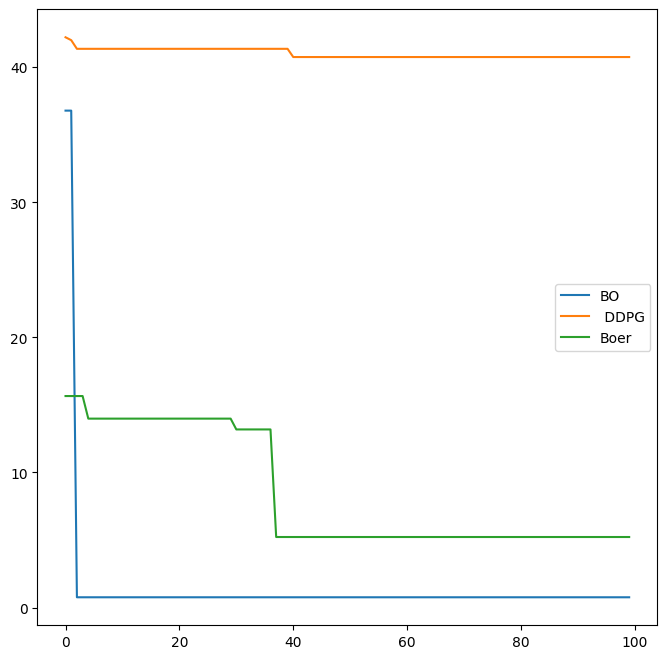

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(best_till_now,label = "BO")
plt.plot(best_till_now_ddpg,label =  " DDPG")
plt.plot(best_till_now_boer,label = "Boer")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

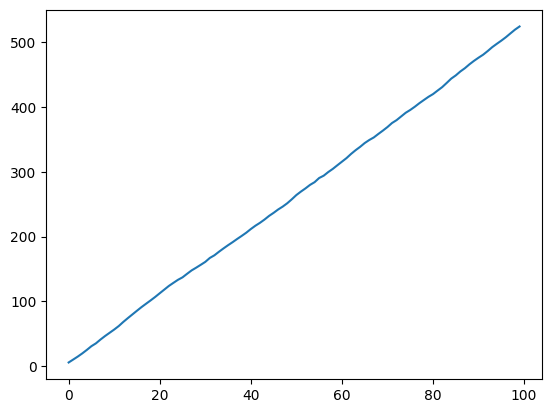

In [ ]:
plt.plot(np.cumsum(ddpg_ret))